# Lab 3: Clustering

The goal of this lab session is to code a clustering algorithm, apply it to data and compare the performance with other techniques.

You have to send the filled notebook named **"L2_familyname1_familyname2.ipynb"** (groups of 2) by email to *lucca.guardiola@centralesupelec.fr* by October 29, 2020. Please put **"AML-L3"** in the subject. 

We begin with the standard imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# I - Implementation of the different clustering algorithms

We will have two toy datasets to try the different methods in order to find the most coherent groups of point for each toy dataset.

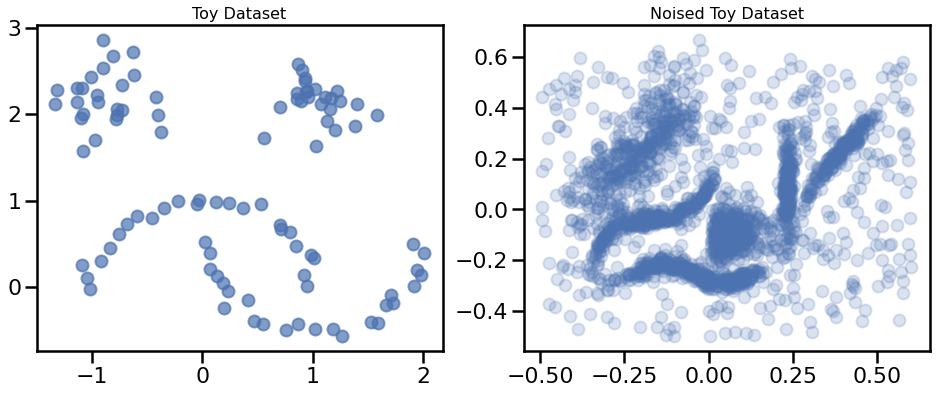

In [14]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])

test_data_1 = np.load('clusterable_data.npy')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show();

## I-1 K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

### Task : Train two kmeans models for datasets test_data_0 and test_data_1 with an arbitrary number of clusters then return clustering labels for datasets test_data_0 and test_data_1.

In [5]:
from sklearn.cluster import KMeans

"""
The output should be : 
kmeans_0_labels : list of labels for test_data_0
kmeans_1_labels : list of labels for test_data_1
"""
#TODO

kmeans_0 = KMeans(n_clusters=4).fit(test_data_0)
kmeans_1 = KMeans(n_clusters=4).fit(test_data_1)
kmeans_0_labels=kmeans_0.labels_
kmeans_1_labels=kmeans_1.labels_

Text(0.5, 1.0, 'Noised Toy Dataset')

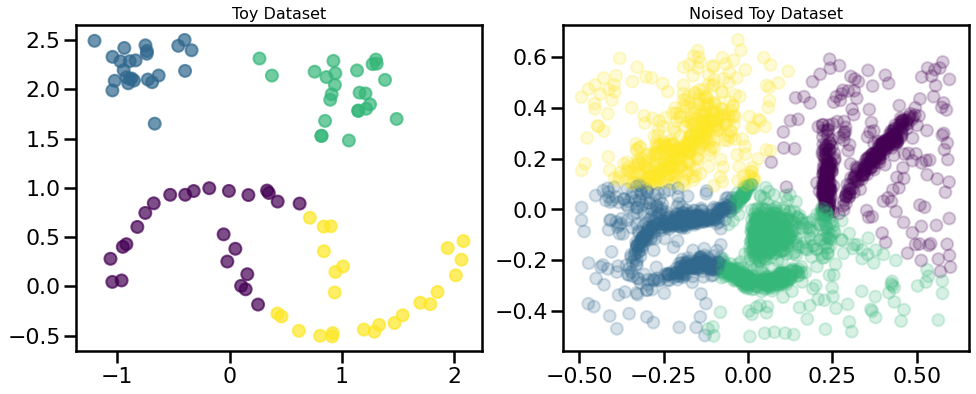

In [6]:
## Plot the results of the clustering - Run this code

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0_labels , alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1_labels, alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

## I-2 How do we choose the number of clusters in kmeans ? 
-By knowing in advance the number of clusters you want to create. For instance you want to divide the clients of an investment bank in three groups depicting the clients' willingness to take risks : low-risk investments clients - average risk-investments clients - high-risk investments client

-By plotting the data. Need a 2D/3D data => could be achieved by dimensionnality reduction methods like PCA or t-SNE etc...

-With metrics (Elbow method, davies-bouldin index, silhouette score)

### The elbow method :

The elbow method is often use to choose the number of cluster K. It consists in computing for several K the inertia $I_K$ induced by the clustering. Then choose $K^*$ sush as $K^* = argmax \frac{d^2}{dK^2} I_K$. It means that $K^*$ is the cutoff point where the decreasing of the inertia is going from sharp to slow.


### Question 
Find the expression of the Inertia for clustering. What could be its interpretation in terms of Variance ? 

Answer : 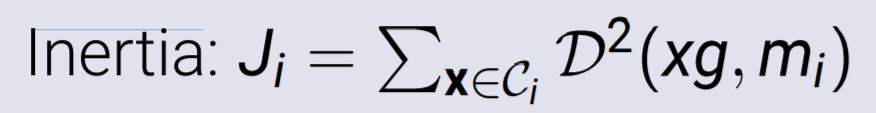

In term of Variance, it means that K* is the cutoff point where the increasing of the percentage of variance explained by the number of clusters is going from sharp to slow. 

### Question 
What could be the reason for choosing $K^*$ like that ?

Answer : Choosing K* like that means choosing a number of cluster high enough to enlight the diversity in data but not too high to overfit the training data. 

### Task : Fill the plot_inertia fonction 

In [7]:
def plot_inertia(k_min,k_max,data):
    """ Fit several kmeans models with different K in order to find visually the optimal K with the elbow method 

    Output : 
    plot the inertia as a function of the number of clusters
    """
    inertia = []
    for k in range(k_min,k_max):
        kmeans = KMeans(n_clusters=k).fit(data)
        inertia.append(kmeans.inertia_)   
        
        
    plt.plot([k for k in range(k_min,k_max)],inertia)

### Task : Using the plot_inertia function and the elbow method, find visually $K^*$ for test_data_0 and test_data_1 ; then plot your clusterings with the scatterplot

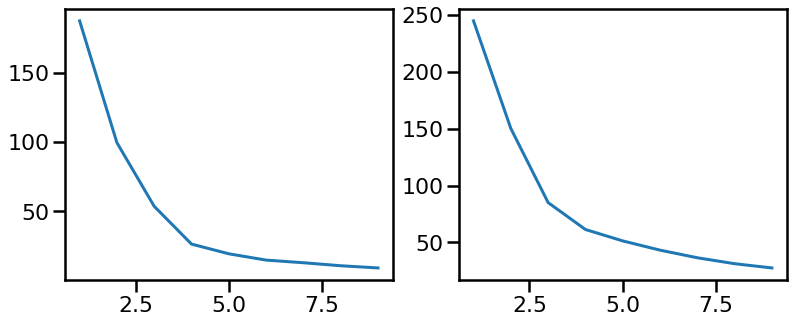

In [8]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plot_inertia(1,10,test_data_0)
plt.subplot(132)
plot_inertia(1,10,test_data_1)

## Visually, K* seems to be around 4 for both datasets

## I-3 Aglomerative Single Linkage clustering

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.



### Task  : use the cluster.AgglomerativeClustering function of sklearn for dataset test_data_0 and test_data_1 with a single linkage and with the number of cluster of your choice

In [12]:
linkage_0 = cluster.AgglomerativeClustering(n_clusters=4, linkage="single").fit(test_data_0)
linkage_1 = cluster.AgglomerativeClustering(n_clusters=4, linkage="single").fit(test_data_1)



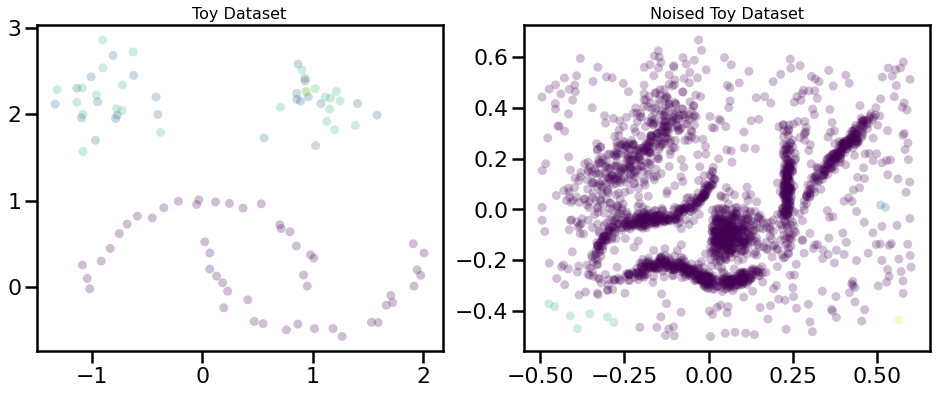

In [15]:
### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

### Question : Comment the results :

In [ ]:
#The single linkage method is sensitive to noise and outliers.

### Task : Now use the cluster.AgglomerativeClustering function for dataset test_data_0 and test_data_1 with a WARD linkage, and with the number of clusters of your choice. Then plot the results

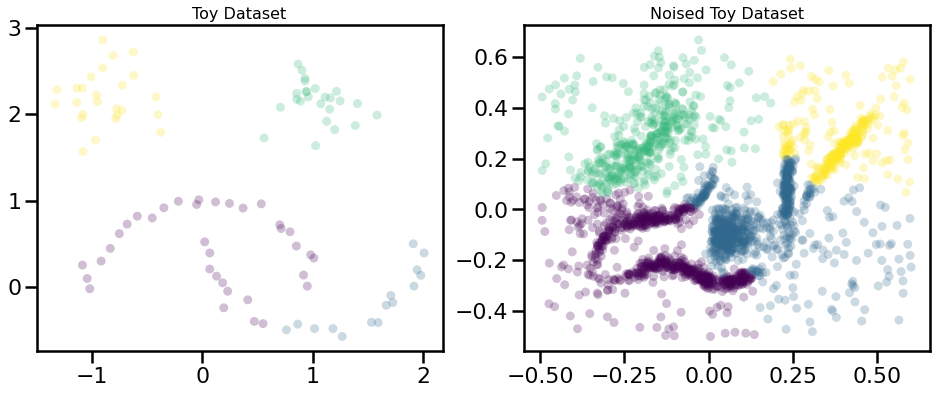

In [16]:
linkage_0 = cluster.AgglomerativeClustering(n_clusters=4, linkage="ward").fit(test_data_0)
linkage_1 = cluster.AgglomerativeClustering(n_clusters=4, linkage="ward").fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

### Question : Give a possible explanation of why ward linkage performs better than single linkage

In [ ]:
#The ward linkage take in account the distance between the centroids of clusters whereas the single linkage takes 
#into account the minimum of the distance between two clusters.
#the single linkage is more local while the ward linkage is more global.

## I-4 DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

### Apply it to the test_data, how do you tune the parameters?

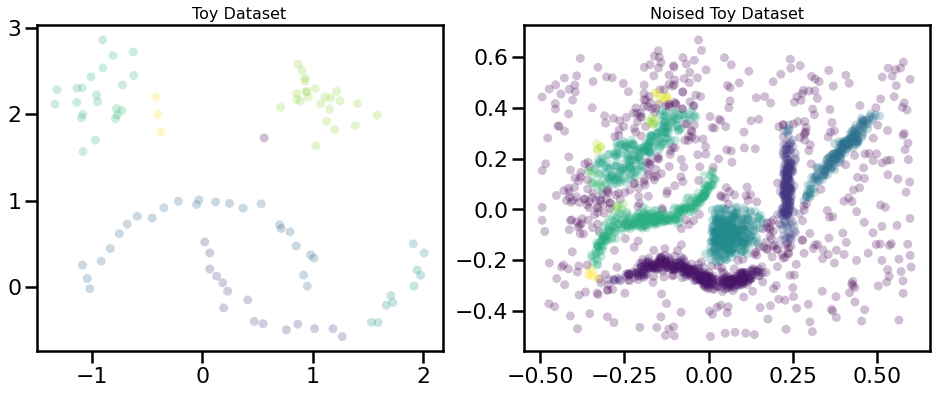

In [17]:
from sklearn.cluster import DBSCAN

DBSCAN_0 = DBSCAN(eps=0.3, min_samples=3).fit(test_data_0)
DBSCAN_1 = DBSCAN(eps=0.018, min_samples=5).fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = DBSCAN_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = DBSCAN_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

# II Apply the algorithms to the following images and comment the results

## You have to choose between exercice II-1 NASA Curiosity Picture or II-2 Color compression !!!!!!!!!!!!!!!!!!!!!

## II-1 NASA Curiosity Picture

- Look at following NASA photo taken by a robot in mars:


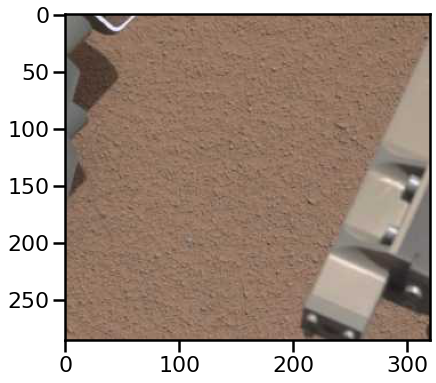

(286, 320, 3)
91520


In [42]:
from PIL import Image

Im_1  = Image.open('im_nasa_reduced.jpg')

fig = plt.figure(figsize=(8, 6))
plt.imshow(Im_1)
plt.show()
Im_matrix = np.array(Im_1)/255.0
print(Im_matrix.shape)
print(286*320)

Transform the image to an intensity (I) and saturation (S) representation, it helps to distinguish bright and textures.
For each pixel i we should have : 
$$I_i=\frac{R_i+G_i+B_i}{3}$$
$$S_i=1-I_i\times min(R_i, G_i, B_i)$$

### TASK : You have to create a matrix $IS$ of size $91520\times2$ such as $IS=\{I_i,S_i\}_{1\le i\le91520}$ 

tips: you can use the method $\texttt{.reshape}$ on a np.array() to give the array the size you want

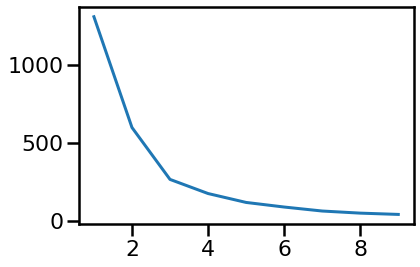

In [43]:
#TODO 
IS = np.zeros((91520,2))
for i in range(286):
    for j in range (320):
        I=(Im_matrix[i][j][0]+Im_matrix[i][j][1]+Im_matrix[i][j][2])/3
        S=1-I*min(Im_matrix[i][j][0], Im_matrix[i][j][1], Im_matrix[i][j][2])
        IS[320*i+j][0]=I
        IS[320*i+j][1]=S
        
plot_inertia(1,10,IS)

### TASK : Apply one clustering algorithm of your choice on dataset IS to segment the image i.e find pixels representing the robot, mars surface etc... 


In [44]:
clustering = cluster.KMeans(n_clusters=3).fit(IS)
label=clustering.labels_
print(label_image.shape)
new_colors=label.reshape((286,320))
print(new_colors.shape)

(91520,)
(286, 320)


### TASK : Then Plot the segmented image and comment the results and check if you find something on mars' surface.


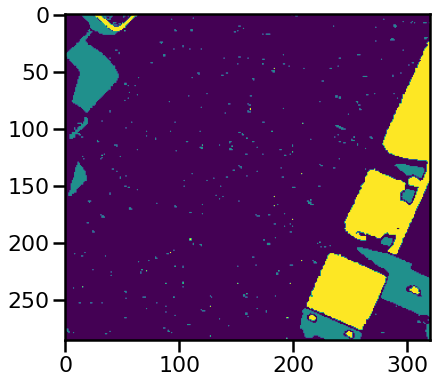

In [45]:
### TODO


##plot new_colors
fig = plt.figure(figsize=(8, 6))
plt.imshow(new_colors) #new colors must be an array of size 286x320
plt.show()

## II-2 Color compression

One interesting application of clustering is in color compression within images. 
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.
Get a simplified colored version of the following image by applying k-means:

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(china);

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)

### Apply clustering methods on the colors of the image. 
For each cluster of colors you can assign a new color corresponding to the color vector of the center of the cluster. The sklearn kmeans can provide the center of each cluster with the attributes cluster_centers_

In [ ]:


##TODO  



china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

You must obtain : 

<img src="./Results.png">